<a href="https://colab.research.google.com/github/OscarG-DataSci/ADS504/blob/main/504_FinalProject_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
d012 = pd.read_csv('https://raw.githubusercontent.com/OscarG-DataSci/ADS504/main/diabetes_012_health_indicators_BRFSS2015.csv')

d5050 = pd.read_csv('https://raw.githubusercontent.com/OscarG-DataSci/ADS504/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

dbinary = pd.read_csv('https://raw.githubusercontent.com/OscarG-DataSci/ADS504/main/diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
print("d012 shape:")
print(d012.shape)

print("")

print("d5050 shape:")
print(d5050.shape)

print("")

print("dbinary shape:")
print(dbinary.shape)

d012 shape:
(253680, 22)

d5050 shape:
(70692, 22)

dbinary shape:
(253680, 22)


# **Predictive Analysis of Diabetes**

In [ ]:
# Necessary Imports 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

**Preprocessing & EDA:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading in the dataset
diabetes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2015.csv')

In [ ]:
# Visualizing the data 
diabetes_df.head(2)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1,1,b'01292015',b'01',b'29',b'2015',1200,2015000001,2015000001,1.0,...,4,2,1.0,1.0,1.0,1,1,NaN,NaN,1.0
1,1,1,b'01202015',b'01',b'20',b'2015',1100,2015000002,2015000002,1.0,...,2,2,3.0,3.0,4.0,2,2,NaN,NaN,2.0


In [ ]:
# checking size of the data 
diabetes_df.shape

(441456, 330)

Total of 330 columns and 441,456 rows of data. There are too many columns to work with. Columns to remove: empty columns, redundant columns, and irrelvant columns.

In [ ]:
# Dimensionality Reduction 

# Looking for any empty columns (85% or higher was empty) 
nan_cols85 = [i for i in diabetes_df.columns if diabetes_df[i].isnull().sum()\
              > 0.85*len(diabetes_df)]

# nan_cols85 <- was too long so it's included below in a condensed format 

In [ ]:
# Removal of Empty Columns 
diabetes_df85 = diabetes_df.copy(deep=True) 
diabetes_df85 = diabetes_df85.drop(['COLGHOUS','LADULT','CCLGHOUS','ASTHNOW',
'DIABAGE2','NUMPHON2','PREGNANT','STOPSMK2','INSULIN','BLDSUGAR','FEETCHK2',
'DOCTDIAB','CHKHEMO3','FEETCHK','EYEEXAM','DIABEYE', 'DIABEDU', 'PAINACT2', 
'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'CRGVREL1', 'CRGVLNG1', 'CRGVHRS1', 
'CRGVPRB1', 'CRGVPERS', 'CRGVHOUS', 'CRGVMST2', 'VIDFCLT2', 'VIREDIF3', 
'VIPRFVS2', 'VINOCRE2', 'VIEYEXM2', 'VIINSUR2', 'VICTRCT4', 'VIGLUMA2', 
'VIMACDG2', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'CDDISCUS', 'WTCHSALT', 
'LONGWTCH', 'DRADVISE', 'ASTHMAGE', 'ASATTACK', 'ASERVIST', 'ASDRVIST', 
'ASRCHKUP', 'ASACTLIM', 'ASYMPTOM', 'ASNOSLEP', 'ASTHMED3', 'ASINHALR', 
'HAREHAB1', 'STREHAB1', 'CVDASPRN', 'ASPUNSAF', 'RLIVPAIN', 'RDUCHART', 
'RDUCSTRK', 'ARTTODAY', 'ARTHWGT', 'ARTHEXER', 'ARTHEDU', 'TETANUS', 'HPVADVC2', 
'HPVADSHT', 'SHINGLE2', 'HADMAM', 'HOWLONG', 'HADPAP2', 'LASTPAP2', 'HPVTEST', 
'HPLSTTST', 'HADHYST2', 'PROFEXAM', 'LENGEXAM', 'BLDSTOOL', 'LSTBLDS3', 
'HADSIGM3', 'HADSGCO1', 'LASTSIG3', 'PCPSAAD2', 'PCPSADI1', 'PCPSARE1', 
'PSATEST1', 'PSATIME', 'PCPSARS1', 'PCPSADE1', 'SCNTPAID', 'SCNTWRK1', 
'SCNTLPAD', 'SCNTLWK1', 'RCSGENDR', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 
'EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1', 
'ADFAIL', 'ADTHINK', 'ADMOVE', 'MISTMNT', 'ADANXEV', '_CRACE1', '_CPRACE', 
'_CLLCPWT'], axis=1)

In [ ]:
diabetes_df85.shape

(441456, 216)

List of empty columns that were removed (filtered out columns having more nan values than a threshold of value of 85%):

'COLGHOUS', 'LADULT', 'CCLGHOUS', 'ASTHNOW', 'DIABAGE2', 'NUMPHON2', 'PREGNANT', 'STOPSMK2', 'INSULIN', 'BLDSUGAR', 'FEETCHK2', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK',' EYEEXAM', 'DIABEYE', 'DIABEDU', 'PAINACT2', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'CRGVREL1', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB1', 'CRGVPERS', 'CRGVHOUS', 'CRGVMST2', 'VIDFCLT2', 'VIREDIF3', 'VIPRFVS2', 'VINOCRE2', 'VIEYEXM2', 'VIINSUR2', 'VICTRCT4', 'VIGLUMA2', 'VIMACDG2', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'CDDISCUS', 'WTCHSALT', 'LONGWTCH', 'DRADVISE', 'ASTHMAGE', 'ASATTACK', 'ASERVIST', 'ASDRVIST', 'ASRCHKUP', 'ASACTLIM', 'ASYMPTOM', 'ASNOSLEP', 'ASTHMED3', 'ASINHALR', 'HAREHAB1', 'STREHAB1', 'CVDASPRN', 'ASPUNSAF', 'RLIVPAIN', 'RDUCHART', 'RDUCSTRK', 'ARTTODAY', 'ARTHWGT', 'ARTHEXER', 'ARTHEDU', 'TETANUS', 'HPVADVC2', 'HPVADSHT', 'SHINGLE2', 'HADMAM', 'HOWLONG', 'HADPAP2', 'LASTPAP2', 'HPVTEST', 'HPLSTTST', 'HADHYST2', 'PROFEXAM', 'LENGEXAM', 'BLDSTOOL', 'LSTBLDS3', 'HADSIGM3', 'HADSGCO1', 'LASTSIG3', 'PCPSAAD2', 'PCPSADI1', 'PCPSARE1', 'PSATEST1', 'PSATIME', 'PCPSARS1', 'PCPSADE1', 'SCNTPAID', 'SCNTWRK1', 'SCNTLPAD', 'SCNTLWK1', 'RCSGENDR', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 'EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE', 'MISTMNT', 'ADANXEV', '_CRACE1', '_CPRACE', '_CLLCPWT'

In [ ]:
diabetes_df85.head(3)
# list(diabetes_df85) <- included below as 'List of variables that are left:' 

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1,1,b'01292015',b'01',b'29',b'2015',1200,2015000001,2015000001,1.0,...,4,2,1.0,1.0,1.0,1,1,NaN,NaN,1.0
1,1,1,b'01202015',b'01',b'20',b'2015',1100,2015000002,2015000002,1.0,...,2,2,3.0,3.0,4.0,2,2,NaN,NaN,2.0
2,1,1,b'02012015',b'02',b'01',b'2015',1200,2015000003,2015000003,1.0,...,9,9,9.0,9.0,9.0,9,9,9.0,9.0,NaN


List of the variables that are left:

['STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'STATERES', 'CELLFON3', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1', 'CELLFON2', 'CADULT', 'PVTRESD2', 'CSTATE', 'LANDLINE', 'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL2', 'CPDEMO1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'LASTSMK2', 'USENOW3', 'ALCDAY5', 'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'FRUITJU1', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1', 'EXERANY2', 'EXRACT11', 'EXEROFT1', 'EXERHMM1', 'EXRACT21', 'EXEROFT2', 'EXERHMM2', 'STRENGTH', 'LMTJOIN3', 'ARTHDIS2', 'ARTHSOCL', 'JOINPAIN', 'SEATBELT', 'FLUSHOT6', 'FLSHTMY2', 'IMFVPLAC', 'PNEUVAC3', 'HIVTST6', 'HIVTSTD3', 'WHRTST10', 'PDIABTST', 'PREDIAB1', 'CAREGIV1', 'CRGVEXPT', 'CIMEMLOS', 'PCDMDECN', 'SCNTMNY1', 'SCNTMEL1', 'SXORIENT', 'TRNSGNDR', 'QSTVER', 'QSTLANG', 'EXACTOT1', 'EXACTOT2', 'MSCODE', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_CHISPNC', '_DUALUSE', '_DUALCOR', '_LLCPWT', '_RFHLTH', '_HCVU651', '_RFHYPE5', '_CHOLCHK', '_RFCHOL', '_MICHD', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR1', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACE_G1', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', 'HTIN4', 'HTM4', 'WTKG3', '_BMI5', '_BMI5CAT', '_RFBMI5', '_CHLDCNT', '_EDUCAG', '_INCOMG', '_SMOKER3', '_RFSMOK3', 'DRNKANY5', 'DROCDY3', 'RFBING5', '_DRNKWEK', '_RFDRHV5', 'FTJUDA1', 'FRUTDA1_', 'BEANDAY_', 'GRENDAY_', 'ORNGDAY_', 'VEGEDA1_', 'MISFRTN', '_MISVEGN', '_FRTRESP', '_VEGRESP', '_FRUTSUM', '_VEGESUM', '_FRTLT1', '_VEGLT1', '_FRT16', '_VEG23', '_FRUITEX', '_VEGETEX', '_TOTINDA', 'METVL11', 'METVL21_', 'MAXVO2_', 'FC60_', 'ACTIN11_', 'ACTIN21_', 'PADUR1_', 'PADUR2_', 'PAFREQ1_', 'PAFREQ2_', 'MINAC11', '_MINAC21', 'STRFREQ', 'PAMISS1_', 'PAMIN11_', 'PAMIN21_', 'PA1MIN_', 'PAVIG11_', 'PAVIG21_', 'PA1VIGM_', '_PACAT1', '_PAINDX1', '_PA150R2', '_PA300R2', '_PA30021', '_PASTRNG', '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2', '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3']

In [ ]:
# Subsetting Data (removal of redundant/irrelevant variables)
diabetes_df85RI = diabetes_df85[['HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH',
                                 'HLTHPLN1', 'BPMEDS','_RFCHOL', 'HTM4', 'WTKG3', 
                                 'ORNGDAY_','GRENDAY_', 'FRUTDA1_', 'FTJUDA1_', 
                                 '_SMOKER3','ASTHMA3',  '_MICHD', 'SEX', 
                                 'BPHIGH4','DIABETE3']]

A set of 30 independent variables alongside the dependent variable was chosen for the predictive analysis based on previous research, which indicated these variables as being an important risk factor for diabetes. Variables that were redundant or irrelevant were removed through this process. Examples of redundant data would include 'SEQNO' and '_PSU' which both indicate the patient's ID or 'CTELENUM'and 'PVTRESD1'which indicated whether or not the survey was taken using a landline. Additionally, there were the variables 'NUMADULT' and 'HHADULT' which both indicated the number of adults in a household. An example of irrelevant data that was removed would include the variable 'CELLFON3' which indicated whether or not the study was conducted via a cell phone.


*   Dependent Variable: 'DIABETE3'
*   Independent Variables: 'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH','HLTHPLN1', 'BPMEDS','RFCHOL', 'HTM4', 'WTKG3', 'ORNGDAY','GRENDAY_', 'FRUTDA1_', 'FTJUDA1_', '_SMOKER3','ASTHMA3', '_MICHD', 'SEX', 'BPHIGH4'



Preprocessing Categorical Variables:

In [ ]:
# GENHLTH
diabetes_df85RI['GENHLTH']=\
 diabetes_df85RI['GENHLTH'].replace({1:0, 2:0, 3:0, 4:1, 5:1, 7:99999, 9:99999})
diabetes_df85RI.GENHLTH.unique()

0 = good health, 1 = bad health

In [ ]:
# HLTHPLN1
diabetes_df85RI['HLTHPLN1']\
= diabetes_df85RI['HLTHPLN1'].replace({1:0, 2:1, 7:99999, 9:99999})

diabetes_df85RI.HLTHPLN1.unique()

0 = have healthcare, 1 = no health care

In [ ]:
# BPMEDS
diabetes_df85RI['BPMEDS']\
= diabetes_df85RI['BPMEDS'].replace({1:0, 2:1, 7:99999, 9:99999})

diabetes_df85RI.BPMEDS.unique()

0 = taking BP meds, 1 = not taking BP meds

In [ ]:
# _SMOKER3
diabetes_df85RI['_SMOKER3']\
= diabetes_df85RI['_SMOKER3'].replace({3:0, 4:0, 1:1, 2:1,9:99999})

diabetes_df85RI._SMOKER3.unique()

0 = non smoker, 1 = smoker

In [ ]:
# ASTHMA3
diabetes_df85RI['ASTHMA3']\
= diabetes_df85RI['ASTHMA3'].replace({2:0, 1:1, 7:99999, 9:99999})

diabetes_df85RI.ASTHMA3.unique()

0 = no asthma, 1 = asthma

In [ ]:
# MICHD
diabetes_df85RI['_MICHD']\
= diabetes_df85RI['_MICHD'].replace({2:0, 1:1, 7:99999, 9:99999})

diabetes_df85RI._MICHD.unique()

0 = no coronary heart disease or myocardial infarction, 1 = heart disease

In [ ]:
# _RFCHOL
diabetes_df85RI['_RFCHOL']\
= diabetes_df85RI['_RFCHOL'].replace({1:0, 2:1, 9:99999})

diabetes_df85RI._RFCHOL.unique()

0 = okay LDL, 1 = high LDL

In [ ]:
# BPHIGH4
diabetes_df85RI['BPHIGH4']\
= diabetes_df85RI['BPHIGH4'].replace({2:0, 3:0, 4:0, 7:99999, 9:99999})

diabetes_df85RI.BPHIGH4.unique()

0 = normal BP, 1 = high bp

In [ ]:
# SEX
diabetes_df85RI['SEX']\
= diabetes_df85RI['SEX'].replace({2:0})

diabetes_df85RI.SEX.unique()

0 = female, 1 = male

In [ ]:
# DIABETE3 -> Binary outcome with unknown 
diabetes_df85RI['DIABETE3']\
= diabetes_df85RI['DIABETE3'].replace({2:1, 3:0, 4:0, 7:99999, 9:99999})

diabetes_df85RI.DIABETE3.unique()

1 = diabetic, 0 = not diabetic, 99999 = unknown (<- this will be imputed after splitting)

Recoding the unknown responses as 99999 to be imputed later for the numeric data:

In [ ]:
# HHADULT
diabetes_df85RI['HHADULT']\
= diabetes_df85RI['HHADULT'].replace({77:99999, 99:99999})

In [ ]:
# PHYSHLTH
diabetes_df85RI['PHYSHLTH']\
= diabetes_df85RI['PHYSHLTH'].replace({77:99999, 99:99999})

In [ ]:
# DIABETES3
diabetes_df85RI = diabetes_df85RI[diabetes_df85RI.DIABETE3 != 99999]
diabetes_df85RI = diabetes_df85RI.dropna(subset=['DIABETE3'])

In [ ]:
# MENTHLTH
diabetes_df85RI['MENTHLTH']\
= diabetes_df85RI['MENTHLTH'].replace({77:99999, 99:99999})

In [ ]:
# Splitting of the data to avoid any data leakage 80% Train/20% Test
x = diabetes_df85RI.loc[:, diabetes_df85RI.columns !="DIABETE3"]
y = diabetes_df85RI['DIABETE3']
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
# Handling Missing Values for x_train 
x_train[x==99999] = np.nan
x_train.BPHIGH4.unique() # checking that the 99999 was replaced w/NA

imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(x_train)
x_train1 = imp_mean.transform(x_train)
x_train1 = pd.DataFrame(x_train1, columns = ['HHADULT', 'GENHLTH', 'PHYSHLTH', 
          'MENTHLTH','HLTHPLN1', 'BPMEDS','_RFCHOL', 'HTM4', 'WTKG3', 
           'ORNGDAY_','GRENDAY_', 'FRUTDA1_', 'FTJUDA1_','_SMOKER3','ASTHMA3',  
           '_MICHD', 'SEX', 
          'BPHIGH4',])
x_train1.head()
x_train1.isnull().sum()

HHADULT     0
GENHLTH     0
PHYSHLTH    0
MENTHLTH    0
HLTHPLN1    0
BPMEDS      0
_RFCHOL     0
HTM4        0
WTKG3       0
ORNGDAY_    0
GRENDAY_    0
FRUTDA1_    0
FTJUDA1_    0
_SMOKER3    0
ASTHMA3     0
_MICHD      0
SEX         0
BPHIGH4     0
dtype: int64

In [ ]:
# Handling Missing Values for x_test
x_test[x==99999] = np.nan
imp_mean.fit(x_train)
x_test1 = imp_mean.transform(x_test)
x_test1 = pd.DataFrame(x_test1, columns = ['HHADULT', 'GENHLTH', 'PHYSHLTH', 
          'MENTHLTH','HLTHPLN1', 'BPMEDS','_RFCHOL', 'HTM4', 'WTKG3', 
           'ORNGDAY_','GRENDAY_', 'FRUTDA1_', 'FTJUDA1_','_SMOKER3','ASTHMA3',  
           '_MICHD', 'SEX', 
          'BPHIGH4',])
x_test1.head()
x_test1.isnull().sum()

HHADULT     0
GENHLTH     0
PHYSHLTH    0
MENTHLTH    0
HLTHPLN1    0
BPMEDS      0
_RFCHOL     0
HTM4        0
WTKG3       0
ORNGDAY_    0
GRENDAY_    0
FRUTDA1_    0
FTJUDA1_    0
_SMOKER3    0
ASTHMA3     0
_MICHD      0
SEX         0
BPHIGH4     0
dtype: int64

In [ ]:
x_train1.describe()

,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,BPMEDS,_RFCHOL,HTM4,WTKG3,ORNGDAY_,GRENDAY_,FRUTDA1_,FTJUDA1_,_SMOKER3,ASTHMA3,_MICHD,SEX,BPHIGH4
count,352526.000000,352526.000000,352526.000000,352526.000000,352526.000000,352526.000000,352526.000000,352526.000000,352526.000000,3.525260e+05,3.525260e+05,3.525260e+05,3.525260e+05,352526.000000,352526.000000,352526.000000,352526.000000,352526.000000
mean,2.060915,0.185632,60.769555,64.746762,0.072641,0.065414,0.362050,169.251221,8163.616099,2.694903e+01,6.036732e+01,1.003490e+02,3.257755e+01,0.139760,0.134007,0.087225,0.423696,0.403304
std,0.702299,0.388810,37.137848,35.876796,0.259547,0.247255,0.480594,10.453759,2099.017827,4.327915e+01,6.392758e+01,1.049792e+02,6.751115e+01,0.346738,0.340660,0.282165,0.494144,0.490561
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,91.000000,2268.000000,5.400000e-79,5.400000e-79,5.400000e-79,5.400000e-79,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,15.000000,28.000000,0.000000,0.000000,0.000000,163.000000,6804.000000,3.000000e+00,1.700000e+01,4.300000e+01,5.400000e-79,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,88.000000,88.000000,0.000000,0.000000,0.000000,168.000000,7938.000000,1.400000e+01,4.300000e+01,1.000000e+02,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,88.000000,88.000000,0.000000,0.000000,1.000000,178.000000,9072.000000,3.300000e+01,1.000000e+02,1.000000e+02,4.300000e+01,0.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,88.000000,88.000000,1.000000,1.000000,1.000000,241.000000,28985.000000,9.900000e+03,9.900000e+03,9.900000e+03,9.900000e+03,1.000000,1.000000,1.000000,1.000000,1.000000


Preprocessing Numeric Variables:

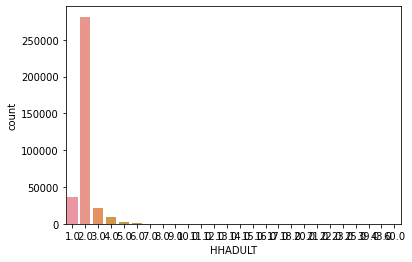

In [ ]:
# HHADULT 
ax = sns.countplot(x="HHADULT",data=x_train1)

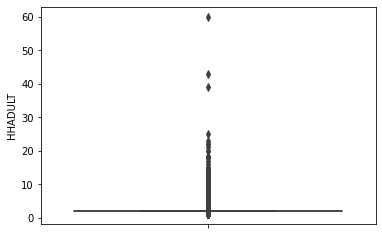

In [ ]:
sns.boxplot( y=x_train1["HHADULT"]);
plt.show()

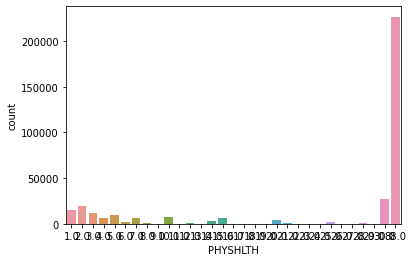

In [ ]:
# PHYSHLTH
ax = sns.countplot(x="PHYSHLTH",data=x_train1)

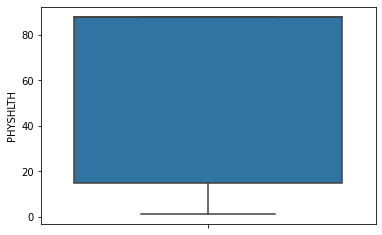

In [ ]:
sns.boxplot( y=x_train1["PHYSHLTH"]);
plt.show()

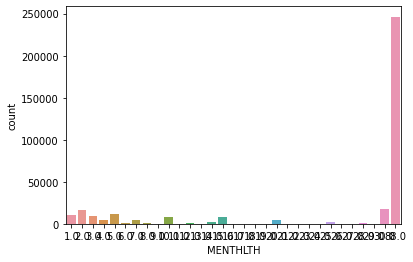

In [ ]:
# MENTHLTH
ax = sns.countplot(x="MENTHLTH",data=x_train1)

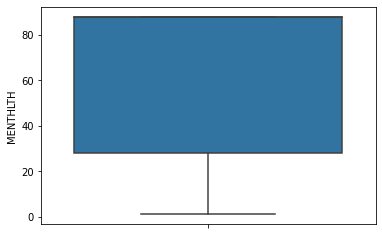

In [ ]:
sns.boxplot( y=x_train1["MENTHLTH"]);
plt.show()

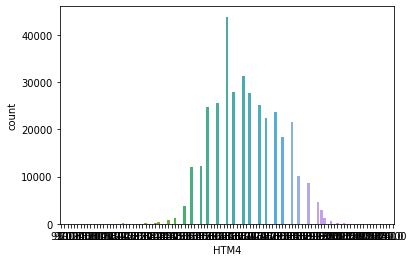

In [ ]:
# HTM4
ax = sns.countplot(x="HTM4",data=x_train1)

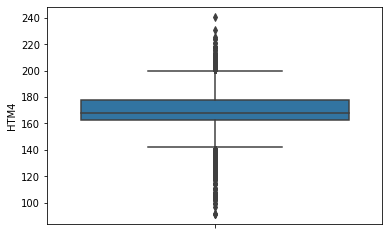

In [ ]:
sns.boxplot( y=x_train1["HTM4"]);
plt.show()

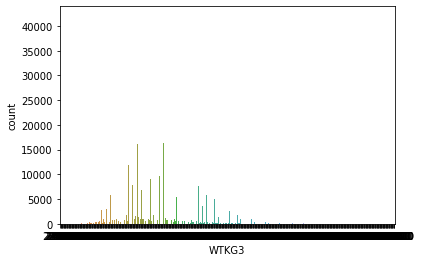

In [ ]:
# WTKG3
ax = sns.countplot(x="WTKG3",data=x_train1)

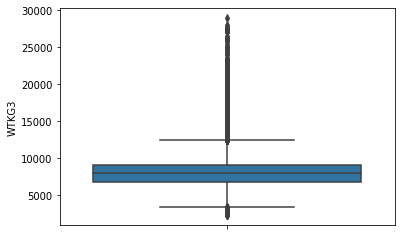

In [ ]:
sns.boxplot( y=x_train1["WTKG3"]);
plt.show()

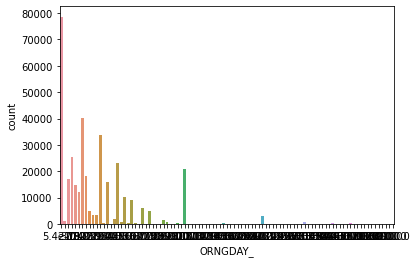

In [ ]:
# ORNGDAY_
ax = sns.countplot(x="ORNGDAY_",data=x_train1)

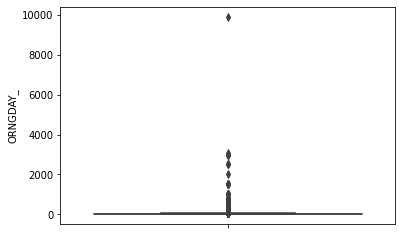

In [ ]:
sns.boxplot( y=x_train1["ORNGDAY_"]);
plt.show()

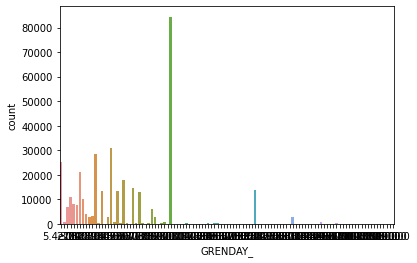

In [ ]:
# GRENDAY_
ax = sns.countplot(x="GRENDAY_",data=x_train1)

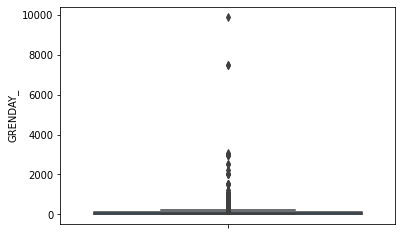

In [ ]:
sns.boxplot( y=x_train1["GRENDAY_"]);
plt.show()

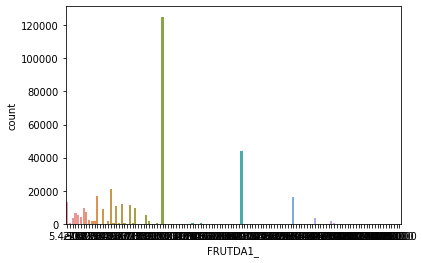

In [ ]:
# FRUTDA1
ax = sns.countplot(x="FRUTDA1_",data=x_train1)

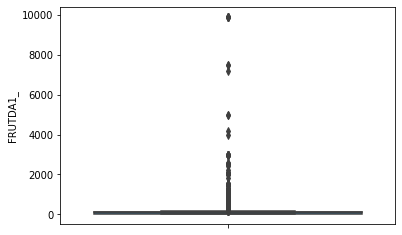

In [ ]:
sns.boxplot( y=x_train1["FRUTDA1_"]);
plt.show()

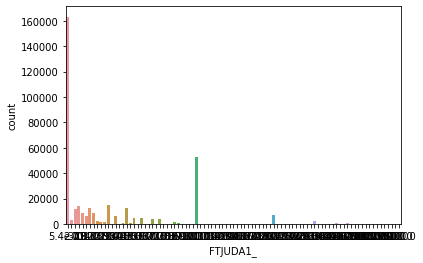

In [ ]:
# FTJUDA1 
ax = sns.countplot(x="FTJUDA1_",data=x_train1)

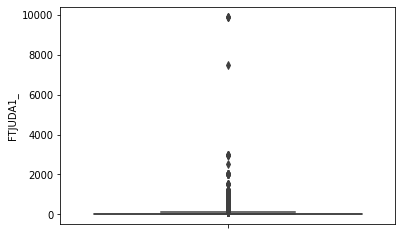

In [ ]:
sns.boxplot( y=x_train1["FTJUDA1_"]);
plt.show()

In [ ]:
# handling outliers (HHADULT, TRM4, WTKG3, ORNGDAY_, GRENDAY_, FRUTDA1_, 
# FTJUDA1_) for x_train1 and x_test1 

# x_train1 
cols = ['HHADULT', 'HTM4', 'WTKG3', 'ORNGDAY_', 'GRENDAY_', 'FRUTDA1_',
        'FTJUDA1_'] 

Q1 = x_train1[cols].quantile(0.25)
Q3 = x_train1[cols].quantile(0.75)
IQR = Q3 - Q1

x_train1O = x_train1[~((x_train1[cols] < (Q1 - 1.5 * IQR))\
                       |(x_train1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


# x_test1 
Q1 = x_test1[cols].quantile(0.25)
Q3 = x_test1[cols].quantile(0.75)
IQR = Q3 - Q1

x_test1O = x_test1[~((x_test1[cols] < (Q1 - 1.5 * IQR))\
                     |(x_test1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

Outliers were handled using the z-score found for each of the variables.

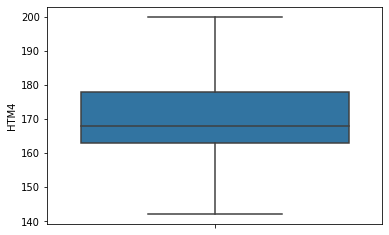

In [ ]:
# HTM4 check 
sns.boxplot( y=x_train1O["HTM4"]);
plt.show()

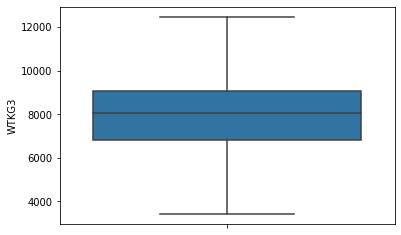

In [ ]:
# WTKG3 check 
sns.boxplot( y=x_train1O["WTKG3"]);
plt.show()

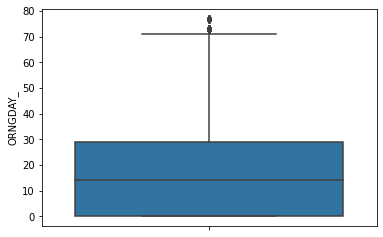

In [ ]:
# ORNGDAY_ check 
sns.boxplot( y=x_train1O["ORNGDAY_"]);
plt.show()

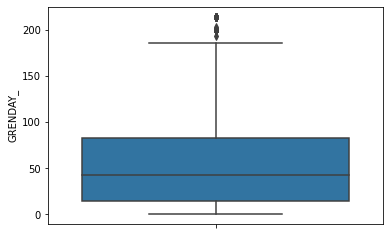

In [ ]:
# GRENDAY_ check 
sns.boxplot( y=x_train1O["GRENDAY_"]);
plt.show()

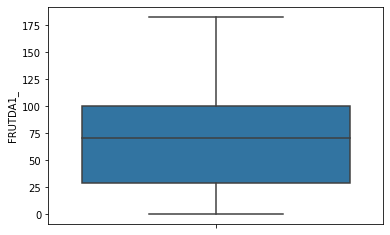

In [ ]:
# FRUTDA1_ check 
sns.boxplot( y=x_train1O["FRUTDA1_"]);
plt.show()

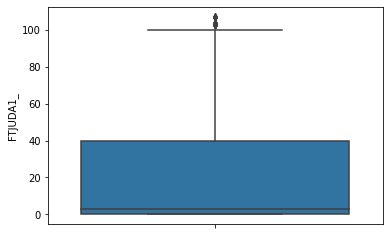

In [ ]:
# FTJUDA1_ check 
sns.boxplot( y=x_train1O["FTJUDA1_"]);
plt.show()

In [ ]:
# Normalizing x_train1o and x_test1o

scaler = StandardScaler()
scaler.fit(x_train1O)
xf_train = scaler.transform(x_train1O)
xf_test = scaler.transform(x_test1O) 


In [ ]:
# x_train and test into a dataframe for later use 
xf_train = pd.DataFrame(xf_train, columns = ['HHADULT', 'GENHLTH', 'PHYSHLTH', 
          'MENTHLTH','HLTHPLN1', 'BPMEDS','_RFCHOL', 'HTM4', 'WTKG3', 
           'ORNGDAY_','GRENDAY_', 'FRUTDA1_', 'FTJUDA1_','_SMOKER3','ASTHMA3',  
           '_MICHD', 'SEX', 
          'BPHIGH4',])

xf_test = pd.DataFrame(xf_test, columns = ['HHADULT', 'GENHLTH', 'PHYSHLTH', 
          'MENTHLTH','HLTHPLN1', 'BPMEDS','_RFCHOL', 'HTM4', 'WTKG3', 
           'ORNGDAY_','GRENDAY_', 'FRUTDA1_', 'FTJUDA1_','_SMOKER3','ASTHMA3',  
           '_MICHD', 'SEX', 
          'BPHIGH4',])

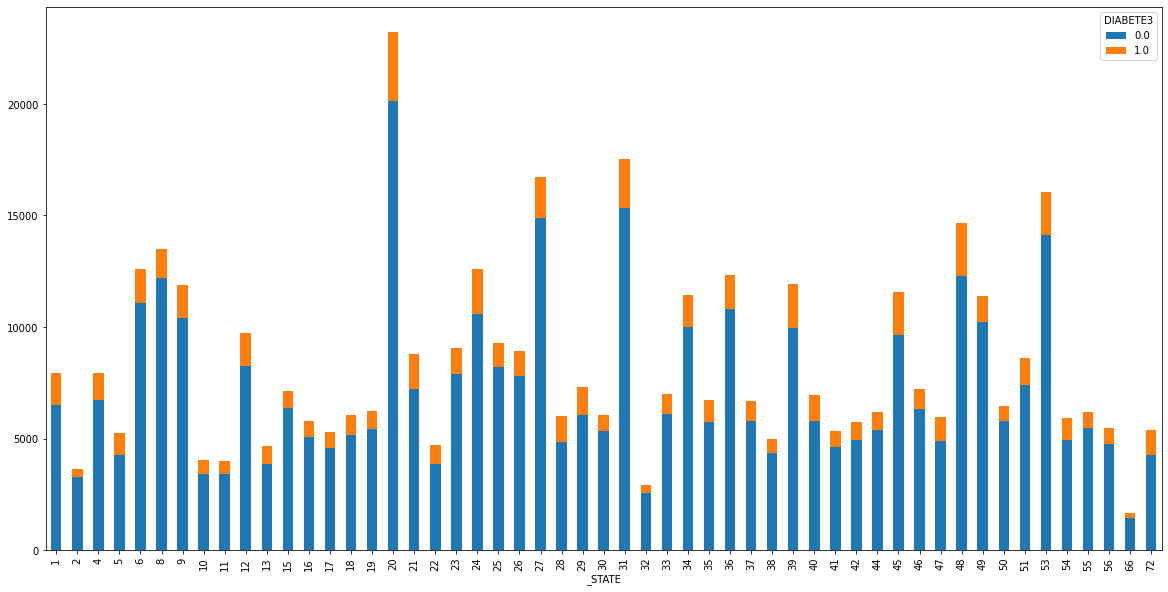

In [ ]:
# Number of people per state with diabetes as an overlay 
crosstab_1 = pd.crosstab(diabetes_df85['_STATE'], diabetes_df85RI['DIABETE3'])
crosstab_1.plot(kind='bar', stacked=True, figsize = (20,10))

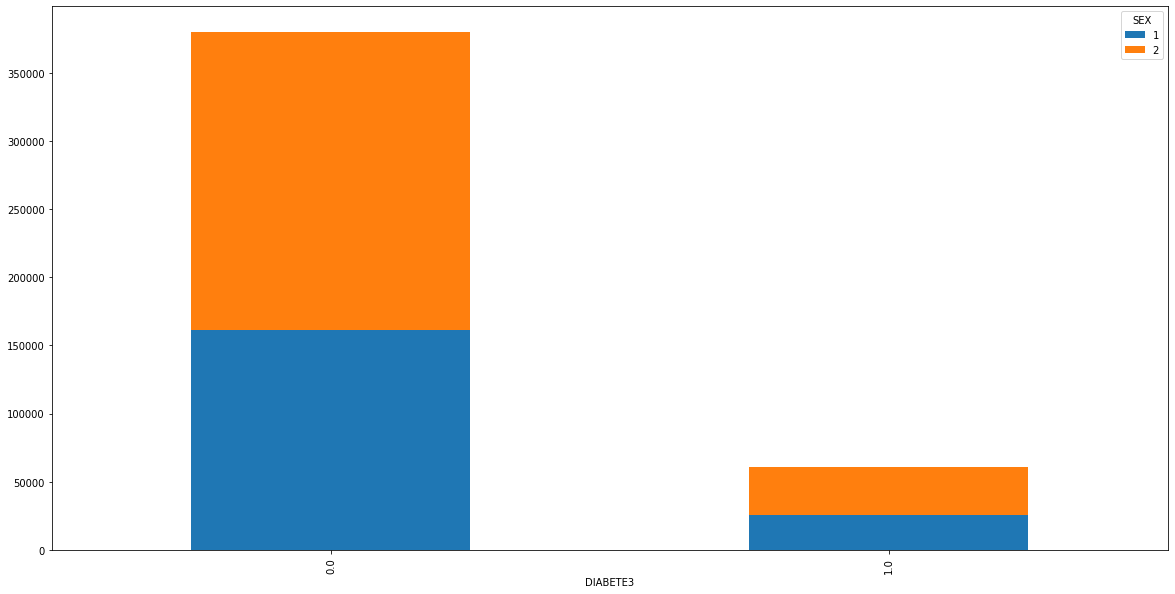

In [ ]:
# EDA: Diabetic vs. Non Diabetic for males vs. females as overlay 
crosstab_1 = pd.crosstab(diabetes_df85RI['DIABETE3'], diabetes_df85['SEX'])
crosstab_1.plot(kind='bar', stacked=True, figsize = (20,10))

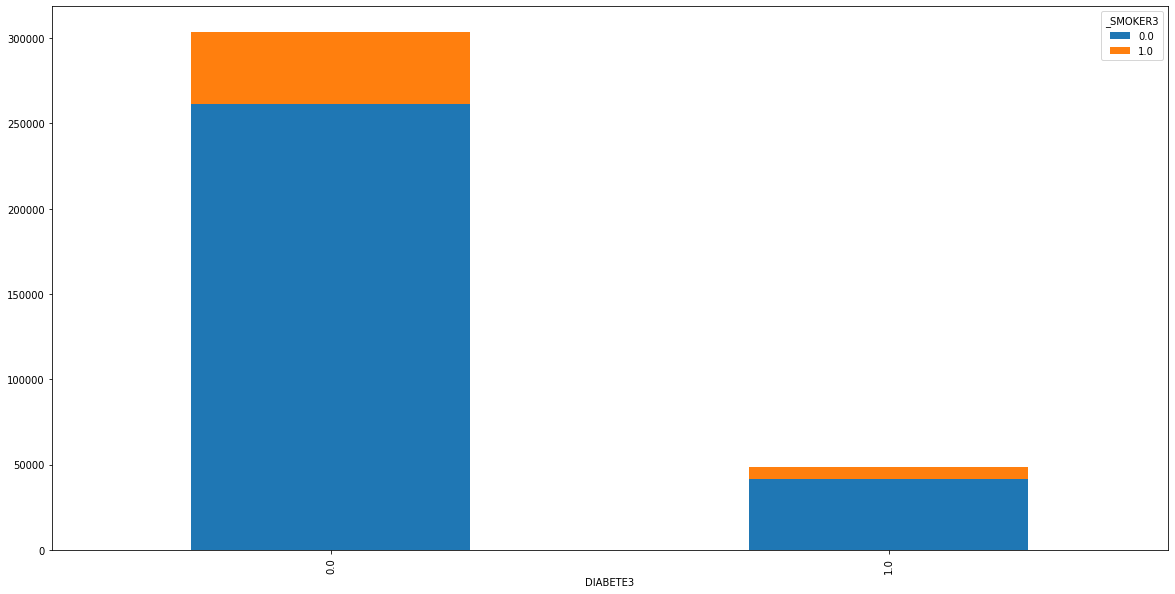

In [ ]:
# EDA: Diabetes vs. Non Diabetic for SMOKERS as overlay 
crosstab_1 = pd.crosstab(diabetes_df85RI['DIABETE3'], x_train1['_SMOKER3'])
crosstab_1.plot(kind='bar', stacked=True, figsize = (20,10))

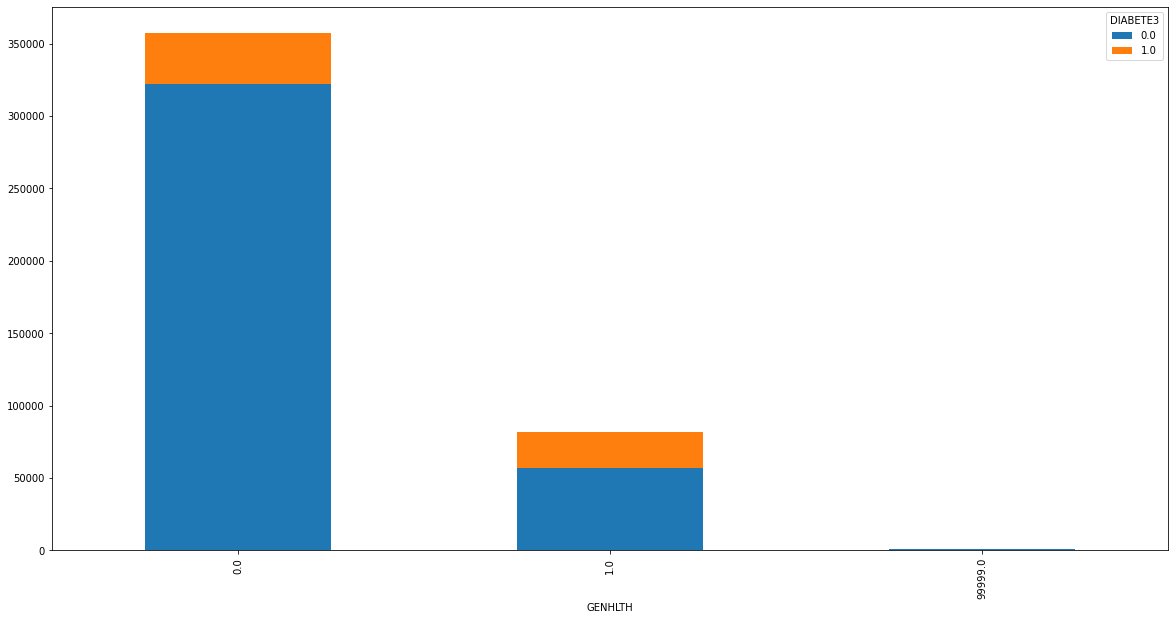

In [ ]:
# GEN HEALTH VS DIABETES 
crosstab_1 = pd.crosstab(diabetes_df85RI['GENHLTH'], 
                         diabetes_df85RI['DIABETE3'])
crosstab_1.plot(kind='bar', stacked=True, figsize = (20,10))

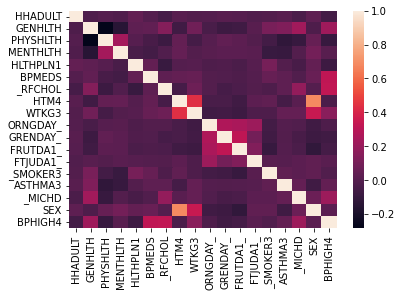

In [ ]:
# Correlation Heatmap 
sns.heatmap(x_train1.corr())

xf_train, xf_test, y_train, and y_test

**Model 1: ---**

**Model 2: ---**

**Model 3: ---**

**Model 4: ---**